In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [15]:



df = pd.concat(pd.read_excel('BCP_16comp_March2022_v6_updated_july22.xlsx', sheet_name=None), ignore_index=True)

#df = pd.concat(pd.read_excel('BCP_16comp_May2021_v4.xlsx', sheet_name=[0,1,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]), ignore_index=True)
           
#df = pd.concat(pd.read_excel('BCP_16comp_May2021_v4.xlsx', sheet_name=[21,22,23]), ignore_index=True)

                

In [16]:
df

,S4Taxon,EnglishName,num,Date,Visit,mapmate,grid,compartment,recorders,comments,recorded,sheet,Unnamed: 12
0,Abies grandis,Giant Fir,1,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,a,NaN
1,Acer campestre,Field Maple,2,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,a,NaN
2,Acer platanoides,Norway Maple,3,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,a,NaN
3,Acer pseudoplatanus,Sycamore,4,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,a,NaN
4,Achillea millefolium,Yarrow,5,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,a,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13495,Bromopsis ramosa,NaN,536,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,z,NaN
13496,Aquilegia vulgaris,NaN,537,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,z,NaN
13497,Allium subhirsutum,NaN,538,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,z,NaN
13498,Ribes sanguineum,NaN,539,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,z,NaN


In [17]:
visit = df.mapmate=="M1"
visit
records = df[visit]
print(records.shape)


(1211, 13)


In [18]:
visit

0        False
1        False
2        False
3        False
4        False
         ...  
13495    False
13496    False
13497    False
13498    False
13499    False
Name: mapmate, Length: 13500, dtype: bool

In [19]:
data = [df["S4Taxon"],df["compartment"], df["recorded"],df["sheet"]]

all_comps = pd.concat(data, axis=1)
all_comps

,S4Taxon,compartment,recorded,sheet
0,Abies grandis,NaN,NaN,a
1,Acer campestre,NaN,NaN,a
2,Acer platanoides,NaN,NaN,a
3,Acer pseudoplatanus,NaN,NaN,a
4,Achillea millefolium,NaN,NaN,a
...,...,...,...,...
13495,Bromopsis ramosa,NaN,NaN,z
13496,Aquilegia vulgaris,NaN,NaN,z
13497,Allium subhirsutum,NaN,NaN,z
13498,Ribes sanguineum,NaN,NaN,z


#=======================
#data is in long form
plot species by compartment part
#===============

In [20]:
all_comps.to_csv("forplot_long.csv")

<Figure size 1440x720 with 0 Axes>

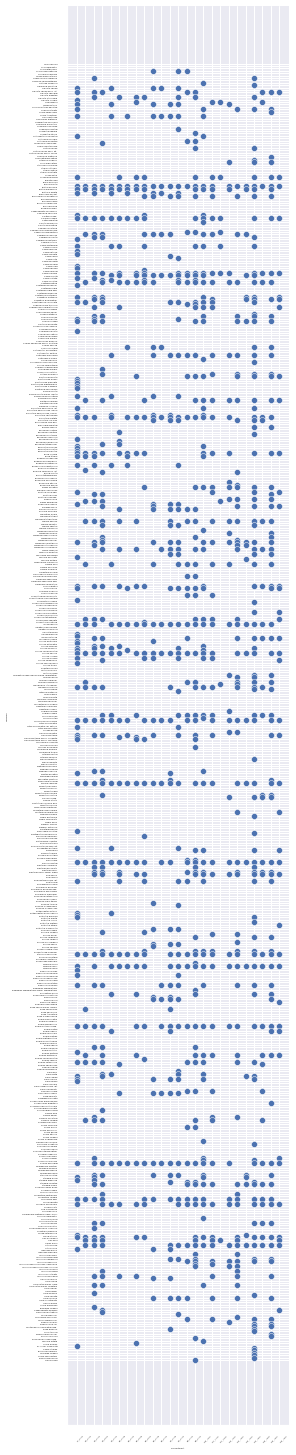

In [21]:
plt.figure(figsize=(20,10))
sns.set_style('whitegrid')
sns.set(font_scale=0.2)

sns.relplot(x="compartment", y="S4Taxon", data=all_comps, sizes = (1,1),height = 20, aspect = 0.2)
plt.xticks(rotation=45,horizontalalignment = "left")
plt.savefig("rec_by_comp_part_all.pdf")
#plt.savefig("all_comp_parts.pdf",figsize=(16, 10), dpi=5000)
#plt.savefig("rec_by_comp_part.png")
# Show plot
plt.show()

https://pandas.pydata.org/docs/user_guide/reshaping.html

https://www.datasciencemadesimple.com/reshape-long-wide-pandas-python-pivot-function/
   
reshape from long to wide

remove rows with all NAs

output spreadsheet which can be used as a prefil

do the same by compartment but do not replace letter column headings at this stage

In [22]:
all_comps

wide_all_comps_part =all_comps.pivot(index='S4Taxon', columns='sheet',values='compartment')
wide_all_comps_part
print(wide_all_comps_part.shape)
wide_all_comps_part.to_csv("compartments_part_all.csv",na_rep= "NaN")
comp_part_only = wide_all_comps_part.dropna(thresh=1)
print(comp_part_only.shape)

(540, 25)
(275, 25)


In [24]:
all_comps

wide_all_comps_part =all_comps.pivot(index='S4Taxon', columns='sheet',values='compartment')
wide_all_comps_part
print(wide_all_comps_part.shape)
wide_all_comps_part.to_csv("compartments_part_all.csv",na_rep= "NaN")
comp_part_only = wide_all_comps_part.dropna(thresh=1)
print(comp_part_only.shape)
comp_part_only.to_csv("compartments_part_prefill.csv",na_rep= "NaN")

(540, 25)
(275, 25)


In [28]:
wide_all_comps =all_comps.pivot(index='S4Taxon', columns='sheet',values='recorded')
print(wide_all_comps.shape)
wide_comp_only = wide_all_comps.dropna(thresh=1)
print(wide_comp_only.shape)
wide_comp_only.to_csv("recorded_comp.csv",na_rep= "NaN")

(540, 25)
(276, 25)


edit compartment part


In [ ]:
START HERE to get species list per compartment

needed to edit compartments file manually

In [41]:
comp_nodup = pd.read_csv("compartments_all_edit.csv")
print(comp_nodup.shape)

long_comp = pd.melt(comp_nodup, id_vars='S4Taxon', var_name='compartment', value_name='recorded')
long_comp
print(long_comp.shape)
long_comp.to_csv("long_recorded_comp.csv",na_rep= "NaN")

(540, 26)
(13500, 3)


In [42]:
comp_nodup


,S4Taxon,C1,C2,C3,C3.1,C4,C5,C5.1,C5.2,C5.3,...,C10,C11,C11.1,C12,C12.1,C13,C14,C15,C15.1,C16
0,Abies grandis,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Acer campestre,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Acer platanoides,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Acer pseudoplatanus,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Achillea millefolium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535,Viola riviniana,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,C11,NaN,NaN,C12,NaN,NaN,NaN,C15,NaN
536,Viola x contempta,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
537,Viscum album,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
538,Vulpia bromoides,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
S4Taxon = comp_nodup.S4Taxon
S4Taxon


0             Abies grandis
1            Acer campestre
2          Acer platanoides
3       Acer pseudoplatanus
4      Achillea millefolium
               ...         
535         Viola riviniana
536       Viola x contempta
537            Viscum album
538        Vulpia bromoides
539           Vulpia myuros
Name: S4Taxon, Length: 540, dtype: object

In [58]:
C1 = comp_nodup.C1
C2 = comp_nodup.C2
C4 = comp_nodup.C4
C8 = comp_nodup.C8
C9 = comp_nodup.C9
C10 = comp_nodup.C10
C13 = comp_nodup.C13
C14 = comp_nodup.C14
C16 = comp_nodup.C16

In [59]:
comp_nodup.C1

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
      ... 
535    NaN
536    NaN
537    NaN
538    NaN
539    NaN
Name: C1, Length: 540, dtype: object

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
      ... 
535    NaN
536    NaN
537    NaN
538    NaN
539    NaN
Length: 540, dtype: object

In [70]:
C3a = comp_nodup[['C3', 'C3.1']].stack().groupby(level=0).agg('_'.join)
C6a = comp_nodup[['C6', 'C6.1']].stack().groupby(level=0).agg('_'.join)
C7a = comp_nodup[['C7', 'C7.1']].stack().groupby(level=0).agg('_'.join)
C11a = comp_nodup[['C11', 'C11.1']].stack().groupby(level=0).agg('_'.join)
C12a = comp_nodup[['C12', 'C12.1']].stack().groupby(level=0).agg('_'.join)
C15a = comp_nodup[['C15', 'C15.1']].stack().groupby(level=0).agg('_'.join)


In [71]:
C5a = comp_nodup[['C5', 'C5.1','C5.2','C5.3']].stack().groupby(level=0).agg('_'.join)


In [72]:
d = {'S4Taxon':S4Taxon,'C1': C1, 'C2': C2, 'C3': C3a, 'C4': C4, 'C5':C5a, 'C6': C6a, 'C7': C7a, 'C8':C8, 'C9':C9, 'C10':C10, 'C11': C11a, 'C12': C12a,'C13': C13, 'C14': C14, 'C15': C15a,'C16': C16}

df = pd.DataFrame(data=d)

df.to_csv("wide_recorded_comp.csv",na_rep= "NaN")

edit C3_C3 to C3 in excel and save as final
